<a href="https://colab.research.google.com/github/ji-min000/b06/blob/feature%2FML/%EB%AA%85%EC%84%A0)%20%EB%AF%B8%EA%B5%AD%EC%A0%84%EC%9E%90%EC%83%81%EA%B1%B0%EB%9E%98_%EB%B0%B0%EC%86%A1%ED%98%95%ED%83%9C_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 CSV 파일 불러오기 + 인코딩 수정
data = pd.read_csv("/content/drive/MyDrive/Ecommerce2020_Date.csv", encoding='windows-1252')
data

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2020.1.1,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020.1.1,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020.1.1,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020.1.1,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020.1.1,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020.12.30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,2020.12.30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,2020.12.30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,2020.12.30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [ ]:
# prompt: data DataFrame 사용: Categoty 중 Office Supplies의 월간 총 매출을 보게 해줘

data[data['Category'] == 'Office Supplies'].groupby(data['formatted_order_date'].str[:7])['Sales'].sum()


formatted_order_date
2020.1.    21274.289
2020.10    23037.192
2020.11    31472.337
2020.12    30436.942
2020.2.     7407.772
2020.3.    14550.286
2020.4.    15072.191
2020.5.    13736.964
2020.6.    16912.039
2020.7.    10241.468
2020.8.    30059.852
2020.9.    31895.843
Name: Sales, dtype: float64

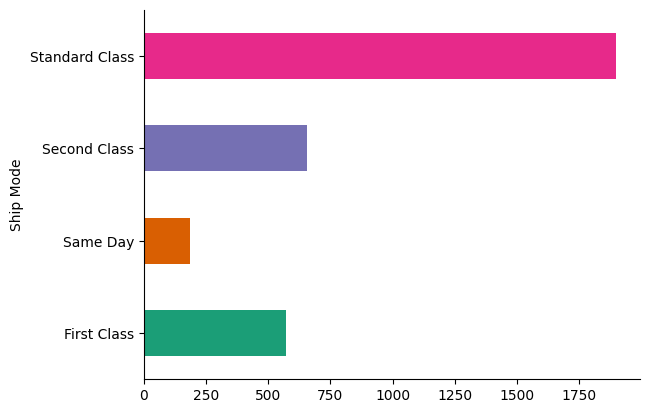

In [ ]:
# @title Ship Mode

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Ship Mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

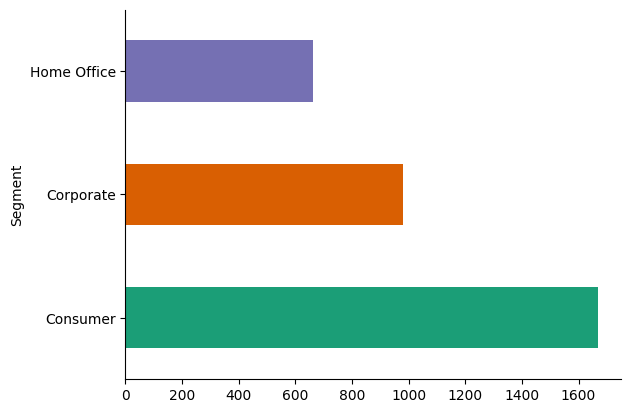

In [ ]:
# @title Segment

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-7-9580c2e2cefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Segment', y='Ship Mode', inner='box', palette='Dark2')


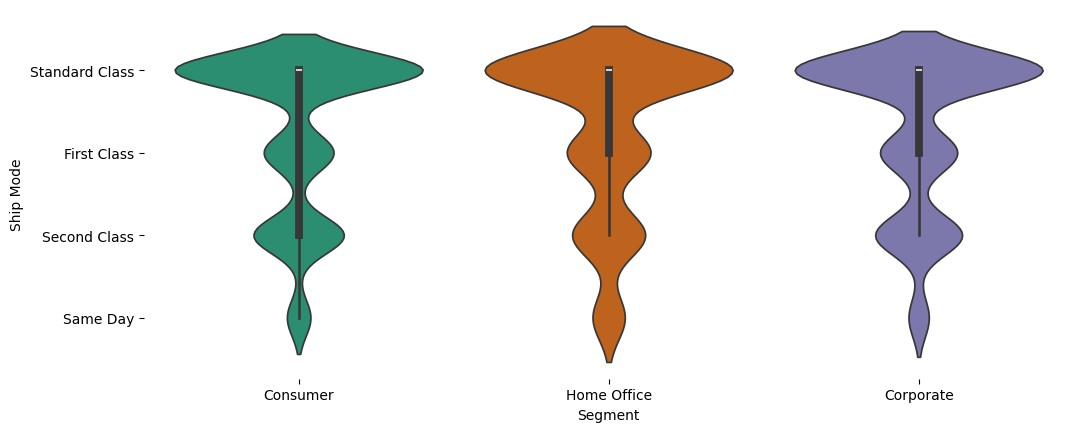

In [ ]:
# @title Ship Mode vs Segment

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Ship Mode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Segment', y='Ship Mode', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

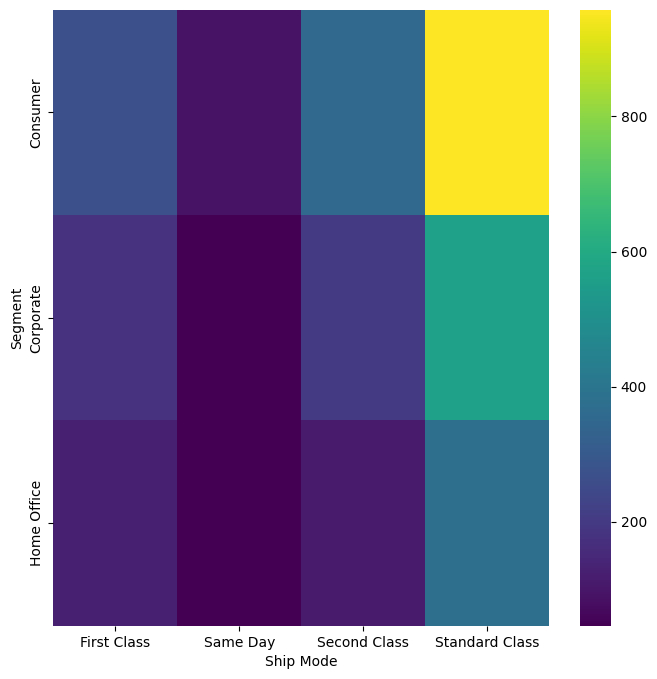

In [ ]:
# @title Ship Mode vs Segment

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Segment'].value_counts()
    for x_label, grp in data.groupby('Ship Mode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ship Mode')
_ = plt.ylabel('Segment')

In [ ]:
print(data.columns)

Index(['formatted_order_date', 'Row ID', 'Order ID', 'Ship Mode',
       'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   formatted_order_date  3312 non-null   object 
 1   Row ID                3312 non-null   int64  
 2   Order ID              3312 non-null   object 
 3   Ship Mode             3312 non-null   int64  
 4   Customer ID           3312 non-null   object 
 5   Segment               3312 non-null   object 
 6   Country               3312 non-null   object 
 7   City                  3312 non-null   object 
 8   State                 3312 non-null   object 
 9   Postal Code           3312 non-null   int64  
 10  Region                3312 non-null   object 
 11  Product ID            3312 non-null   object 
 12  Category              3312 non-null   object 
 13  Sub-Category          3312 non-null   object 
 14  Product Name          3312 non-null   object 
 15  Sales                

In [ ]:
#범주형 데이터를 수치형 데이터로 변환
import pandas as pd

# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/Ecommerce2020_Date.csv", encoding='windows-1252')

# 'Ship Mode' 열의 값을 수치형 데이터로 매핑
ship_mode_mapping = {'Same Day': 0, 'First Class': 1, 'Second Class': 2, 'Standard Class': 3}
data['Ship Mode'] = data['Ship Mode'].map(ship_mode_mapping)

# 'Segment' 열의 값을 수치형 데이터로 매핑
segment_mapping = {'Consumer': 0, 'Home Office': 1, 'Corporate': 2}
data['Segment'] = data['Segment'].map(segment_mapping)

# 매핑된 데이터 값 불러오기
data.head(5)

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2020.1.1,849,CA-2017-107503,3,GA-14725,0,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020.1.1,4010,CA-2017-144463,3,SC-20725,0,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020.1.1,6683,CA-2017-154466,1,DP-13390,1,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020.1.1,8070,CA-2017-151750,3,JM-15250,0,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020.1.1,8071,CA-2017-151750,3,JM-15250,0,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 독립 변수(X)와 종속 변수(y)로 데이터 분할
X = data[['Segment', 'Ship Mode']]  # 독립 변수
y = data['Ship Mode']  # 종속 변수

# 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearRegression()

In [ ]:
# 학습된 모델로 예측
y_pred = model.predict(X)

# 모델 성능 평가 (예: 평균 제곱 오차)
mse = mean_squared_error(y, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.5778596878514054e-30


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MSE가 거의 제로에 가까운 오차로, 모델이 테스트 데이터에 대해 매우 정확하게 예측한 것을 의미


범주형 데이터를 그대로 선형회귀 할 수 없는 노릇이라, 일단 선형회귀 하기 전 범주형 데이터를 수치형으로 일괄 변환하였습니다.
###[배송형태]
‘Same Day’: 0, ‘First Class’: 1, ‘Second Class’: 2, ‘Standard Class’: 3

Same Day > First Class > Second Class > Standard Class 순으로 가격이 비싸니

Same Day < First Class < Second Class < Standard Class 순으로 사용량이 많았던 것을 고려하여 수치화 하였습니다.

###[세그먼트]
‘Consumer’: 0, ‘Home Office’: 1, ‘Corporate’: 2

Consumer > Home Office > Corporate 순으로 고객수가 형성되어있어 고객수가 많았던 것을 고려하여 수치화 하였습니다.

#### 독립변수 : Segment, Ship Mode
#### 종속변수 : Ship Mode


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

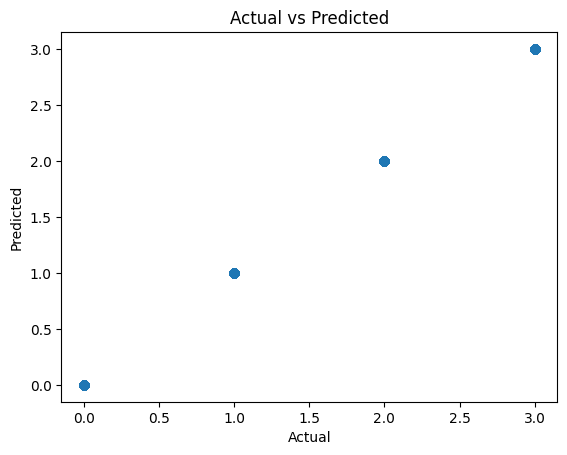

In [ ]:
# 독립 변수(X)와 종속 변수(y)로 데이터 분할
X = data[['Segment', 'Ship Mode']]  # 독립 변수
y = data['Ship Mode']  # 종속 변수

# 선형 회귀 모델 피팅
X = sm.add_constant(X)  # 절편(intercept)을 위해 상수항 추가
model = sm.OLS(y, X).fit()

# 모델 예측값 계산
predictions = model.predict(X)

# 데이터와 예측값 시각화
plt.scatter(y, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

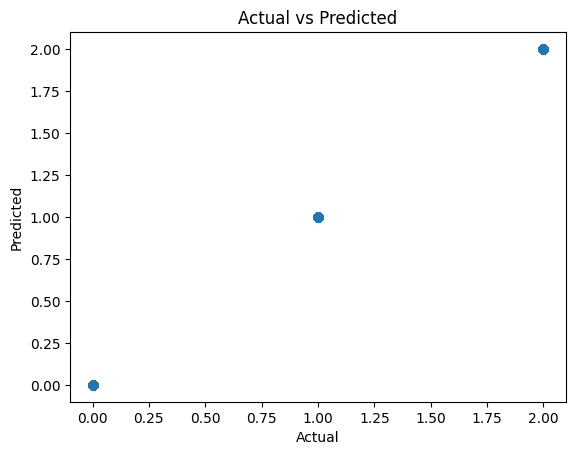

In [ ]:
# 독립 변수(X)와 종속 변수(y)로 데이터 분할
X = data[['Segment', 'Ship Mode']]  # 독립 변수
y = data['Segment']  # 종속 변수

# 선형 회귀 모델 피팅
X = sm.add_constant(X)  # 절편(intercept)을 위해 상수항 추가
model = sm.OLS(y, X).fit()

# 모델 예측값 계산
predictions = model.predict(X)

# 데이터와 예측값 시각화
plt.scatter(y, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()